In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sos = pd.read_csv('D:\LearnSeaborn\StackOverflowServeyData\survey_results_public.csv')

sos.rename(columns = {'ConvertedComp':'Salary'}, inplace = True)


In [3]:
#gets top countries in order of avg salary
sos.loc[sos['Salary'] > 1000].groupby('Country').mean().sort_values('Salary', ascending = False).head(10)

,Respondent,Age,CompTotal,Salary,WorkWeekHrs
Country,,,,,
Nomadic,26450.142857,33.083333,7.142857e+54,310924.142857,41.857143
Lao People's Democratic Republic,51570.000000,45.000000,2.019003e+08,231275.250000,43.000000
United States,28317.906285,34.390115,1.371911e+243,210192.503642,41.748519
Ireland,28306.059649,32.519149,6.512505e+04,183000.740351,39.657609
Afghanistan,37940.761905,24.000000,6.796095e+08,169432.095238,43.800000
Australia,30121.256510,34.660322,1.251677e+05,146926.833333,39.979597
Norway,30631.607407,34.674897,6.723460e+05,143899.074074,55.870229
Switzerland,28784.642659,32.400602,8.521395e+04,142001.936288,39.391168
United Kingdom,29958.392621,33.344574,3.883582e+09,141559.972816,39.151131


In [6]:
clean_sos = sos.loc[(sos['CompFreq'] == 'Yearly')&(sos['Salary'] > 10000)&(sos['Salary'] < 400000)]

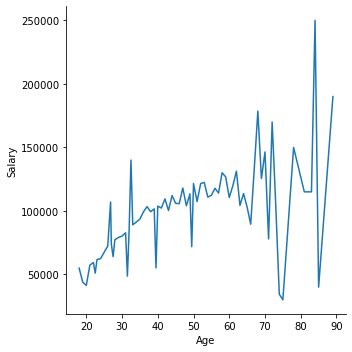

In [5]:
agreg_sos = clean_sos.groupby('Age').mean().reset_index()
agreg_sos = agreg_sos.loc[(agreg_sos['Age'] >= 18)&(agreg_sos['Age'] <= 90)]
agreg_sos
#sns.lineplot(x='Age', y='Salary', data = agreg_sos)
sns.relplot(x='Age', y='Salary', data = agreg_sos, kind = 'line')
#either one

#plt.xticks([], rotation = 70)

In [9]:
usa = clean_sos.loc[clean_sos['Country'] == "United States"]
usa

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,Salary,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
7,8,I am a developer by profession,Yes,36.0,12,Yearly,116000.0,116000.0,United States,United States dollar,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Django;React.js;Vue.js,Flask,Just as welcome now as I felt last year,39.0,17,13
13,14,I am a developer by profession,Yes,27.0,13,Yearly,66000.0,66000.0,United States,United States dollar,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular;Vue.js,Angular;Vue.js,Just as welcome now as I felt last year,40.0,5,1
16,17,I am a developer by profession,Yes,25.0,14,Yearly,79000.0,79000.0,United States,United States dollar,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core;Gatsby;React.js;Vue.js,ASP.NET;Gatsby;jQuery;React.js;Vue.js,Just as welcome now as I felt last year,40.0,7,3
18,19,I am a developer by profession,No,24.0,15,Yearly,83400.0,83400.0,United States,United States dollar,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Django;Express;React.js,Angular;Angular.js;ASP.NET Core,Just as welcome now as I felt last year,35.0,9,3
40,41,I am a developer by profession,No,NaN,15,Yearly,106000.0,106000.0,United States,United States dollar,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",Vue.js,ASP.NET;Vue.js,A lot less welcome now than last year,40.0,25,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64083,65554,I am a developer by profession,Yes,NaN,13,Yearly,230000.0,230000.0,United States,United States dollar,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,40.0,17,7
64113,65586,I am a developer by profession,Yes,NaN,8,Yearly,225000.0,225000.0,United States,United States dollar,...,NaN,NaN,NaN,Mathematics or statistics,NaN,NaN,NaN,50.0,25,15
64116,65589,I am a developer by profession,Yes,NaN,16,Yearly,150000.0,150000.0,United States,United States dollar,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,45.0,10,6
64122,65596,I am a developer by profession,Yes,NaN,22,Yearly,70000.0,70000.0,United States,United States dollar,...,NaN,NaN,NaN,Web development or web design,NaN,Angular.js;Django;jQuery;React.js;Ruby on Rails,A lot more welcome now than last year,40.0,6,4


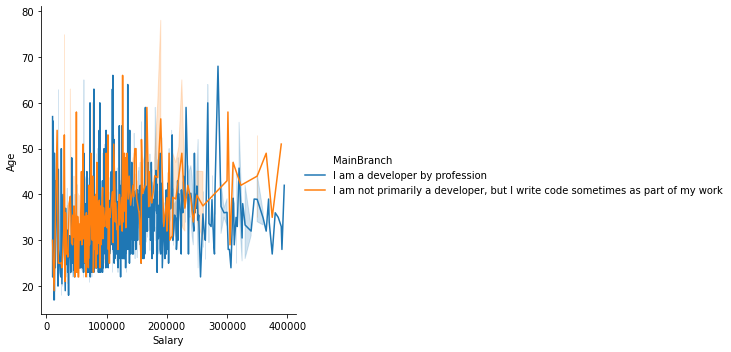

In [7]:

#shows scatterplot of salaries with hue being whether their a professional dev or they just dev in the their work
#As u can see the people who were developers bvy profession had higher salaries on avg than those who just coded as part of their work
sns.relplot('Salary', 'Age', data=usa, kind = 'line', hue = 'MainBranch')


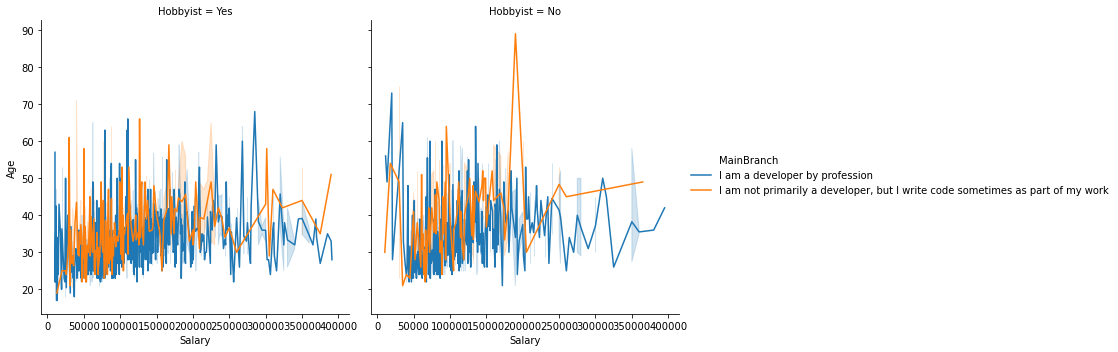

In [10]:


sns.relplot('Salary', 'Age', data=usa, kind = 'line', col = 'Hobbyist', hue = 'MainBranch')

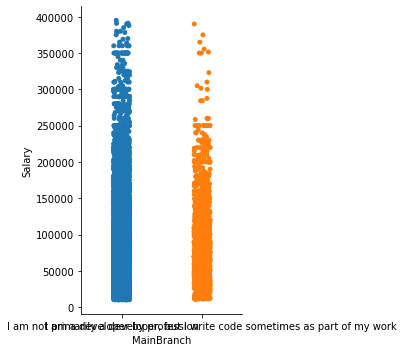

In [11]:
#cat plot
sns.catplot('MainBranch', 'Salary', data=clean_sos)

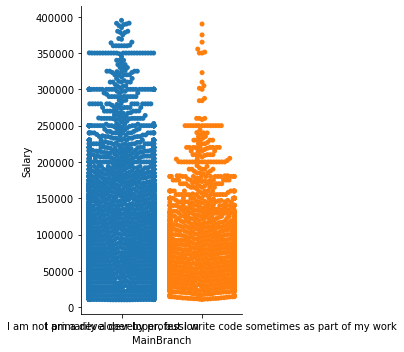

In [10]:
#swarm plot
sns.catplot('MainBranch', 'Salary', data=clean_sos, kind = 'swarm')

In [8]:
#box plot to get rid of outliers
sns.catplot('MainBranch', 'Salary', data=usa, kind = 'box')

NameError: name 'usa' is not defined

<AxesSubplot:xlabel='Salary'>

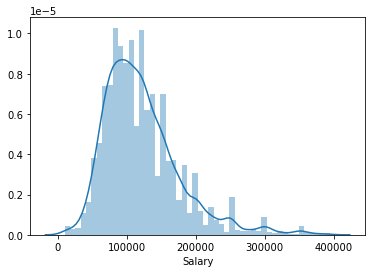

In [16]:
#distribution plots
sns.distplot(usa.Salary)

In [4]:
clean_sos['Young'] = clean_sos['Age']>=18 &clean_sos['Age']<30

TypeError: Cannot perform 'rand_' with a dtyped [float64] array and scalar of type [bool]